# Tree Boosted Gradient #Letters

In [19]:
#Imports
%pylab inline

#For data
import pandas as pd

#For modelling
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report

Populating the interactive namespace from numpy and matplotlib


### Data Importation

In [2]:
communes_dataframe = pd.read_csv("COMMUNES.csv", delimiter=";")
communes_dataframe

,insee,nom,altitude,code_postal,longitude,latitude,pop99,surface,departement,region,indicatif
0,1001,L'Abergement-Clémenciat,257.0,1400,0.085856,0.805508,728,15.70,1,RA,4
1,1002,L'Abergement-de-Varey,367.0,1640,0.094665,0.802987,168,9.14,1,RA,4
2,1004,Ambérieu-en-Bugey,247.0,1500,0.093356,0.802085,11436,24.51,1,RA,4
3,1005,Ambérieux-en-Dombes,293.0,1330,0.085594,0.802784,1408,16.06,1,RA,4
4,1006,Ambléon,400.0,1300,0.097777,0.798493,86,6.03,1,RA,4
5,1007,Ambronay,250.0,1500,0.093540,0.802992,2146,33.64,1,RA,4
6,1008,Ambutrix,270.0,1500,0.093239,0.801795,586,5.19,1,RA,4
7,1009,Andert-et-Condon,330.0,1300,0.098718,0.799283,275,6.95,1,RA,4
8,1010,Anglefort,250.0,1350,0.101384,0.801315,769,29.49,1,RA,4
9,1011,Apremont,900.0,1100,0.098849,0.806517,329,15.09,1,RA,4


### Values of Interest

In [3]:
ALL_COMMUNES = pd.DataFrame(communes_dataframe).values
COMMUNES, TEST_COMMUNES = train_test_split(ALL_COMMUNES, test_size=0.099, random_state=10)
Y_app=COMMUNES[:,9]
X_app=COMMUNES[:,1]
Y_test=TEST_COMMUNES[:,9]
X_test=TEST_COMMUNES[:,1]

print(X_app)
print(Y_app)

['Ligron' 'Schopperten' "Saint-Pierre-d'Autils" ... 'V\x9cgtlinshoffen'
 'Montmort' 'Monflanquin']
['PL' 'AL' 'HN' ... 'AL' 'BO' 'AQ']


### Preparation of data

In [4]:
dictionnary=['a','z','e','r','t','y','u','i','o','p','q','s','d','f','g','h','j','k','l','m','w','x','c','v','b','n','é','-','è','_','ç','à','ê','ô','ë','ÿ','î','â','û','ü','A','Z','E','R','T','Y','U','I','O','P','Q','S','D','F','G','H','J','K','L','M','W','X','C','V','B','N']

def data_initialization(INPUT,pattern=dictionnary):
    OUTPUT=[]
    for e in INPUT:
        #print(e)
        tmp=[]
        for p in dictionnary:
            #print(p)
            tmp.append(e.count(p))
            #print(tmp)
        OUTPUT.append(array(tmp))
    return(array(OUTPUT))

In [5]:
#TESTS

data_initialization(X_test)

array([[0, 0, 0, ..., 0, 0, 0],
       [2, 0, 5, ..., 1, 0, 0],
       [1, 0, 3, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [1, 0, 2, ..., 1, 0, 0],
       [2, 0, 0, ..., 0, 1, 0]])

We need to transform responses which are strings to numbers

In [6]:
XX_app=data_initialization(X_app)
XX_test=data_initialization(X_test)

### Model Creation (X-Validation)

We will create decision trees for classification through boosting gradient.

In other words some parameters for this kind of classification will be chosen as following:

    -booster: gbtree
    
    -objective: multi:softprob
    
    -num_class: 22 (the regions are indexed from 1 to 22
    
Several parameters to fix (through crossed validation):

    -num_round: at 10 for the choice of other paramaters it will be chosen when the other parameters will be fixed.
    
            -early_stopping rounds will be used for (at 3) (The algorithm will stop boosting after 3 steps without an improvment of the model score.
    
    -max_depth, (between 1 and 100)
    
    -Regularisation parameters: reg_alpha (L1)  ,reg_lambda (L2) ,learning_rate, gamma
    
    -n_estimators
        
 To improve the prediction score of the model we will use the stochastic boosting gradient; further arguments may be chosen:
 
     -subsample (betwenn 0 and 1)
    

In [40]:
alpha=[0,0.1,1/2,1,10]
Lambda=[0,0.1,1/2,1,10]
gamma=[0,0.1,1/2,1,10]
l_rate=[0,0.1,0.25,0.5,0.75,1]
max_depth=[1,10,None]
subsample = [0.1, 0.5, 1.0]
n_estimators=[10,100,500]

grid2={'n_estimators':n_estimators,'max_depth':max_depth}
grid1={'reg_alpha':alpha,'reg_lambda':Lambda,'gamma':gamma,'learning_rate':l_rate,'subsample':subsample}

In [43]:
xg_tree=xgb.XGBClassifier('multi:sofprob')
xg_tree

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:sofprob', random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=False, verbosity=None)

In [41]:
xg_tree=xgb.XGBClassifier('multi:sofprob',**{'booster':'gbtree','num_round':5})
xg_tree

XGBClassifier(base_score=None, booster='gbtree', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              num_round=5, objective='multi:sofprob', random_state=None,
              reg_alpha=None, reg_lambda=None, scale_pos_weight=None,
              subsample=None, tree_method=None, validate_parameters=False,
              verbosity=None)

### First: max_depth/n_estimators

In [28]:
search= RandomizedSearchCV(estimator = xg_tree, param_distributions = grid2, n_iter = 50, cv = 2, verbose=2,n_jobs=3)
search

RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster='gbtree',
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=No...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                    

In [29]:
search.fit(XX_app,Y_app)

C:\Users\louis\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 9 is smaller than n_iter=50. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=3)]: Done  18 out of  18 | elapsed: 82.2min finished


RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster='gbtree',
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=No...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                    

Logger:

[CV] n_estimators=10, max_depth=1 ....................................
[CV] n_estimators=100, max_depth=1 ...................................
[CV] n_estimators=10, max_depth=1 ....................................
[CV] ..................... n_estimators=10, max_depth=1, total=  13.2s
[CV] n_estimators=100, max_depth=1 ...................................
[CV] ..................... n_estimators=10, max_depth=1, total=  13.6s
[CV] n_estimators=500, max_depth=1 ...................................
[CV] .................... n_estimators=100, max_depth=1, total= 1.8min
[CV] n_estimators=500, max_depth=1 ...................................
[CV] .................... n_estimators=100, max_depth=1, total= 1.8min
[CV] n_estimators=10, max_depth=10 ...................................
[CV] .................... n_estimators=10, max_depth=10, total=  57.0s
[CV] n_estimators=10, max_depth=10 ...................................
[CV] .................... n_estimators=10, max_depth=10, total=  56.1s
[CV] n_estimators=100, max_depth=10 ..................................
[CV] .................... n_estimators=500, max_depth=1, total=10.0min
[CV] n_estimators=100, max_depth=10 ..................................
[CV] .................... n_estimators=500, max_depth=1, total=10.0min
[CV] n_estimators=500, max_depth=10 ..................................
[CV] ................... n_estimators=100, max_depth=10, total=10.4min
[CV] n_estimators=500, max_depth=10 ..................................
[CV] ................... n_estimators=100, max_depth=10, total=10.0min
[CV] n_estimators=10, max_depth=None .................................
[CV] .................. n_estimators=10, max_depth=None, total=  37.6s
[CV] n_estimators=10, max_depth=None .................................
[CV] .................. n_estimators=10, max_depth=None, total=  37.6s
[CV] n_estimators=100, max_depth=None ................................
[CV] ................. n_estimators=100, max_depth=None, total= 6.4min
[CV] n_estimators=100, max_depth=None ................................
[CV] ................. n_estimators=100, max_depth=None, total= 6.1min
[CV] n_estimators=500, max_depth=None ................................
[CV] ................... n_estimators=500, max_depth=10, total=49.6min
[CV] n_estimators=500, max_depth=None ................................
[CV] ................... n_estimators=500, max_depth=10, total=49.7min
[CV] ................. n_estimators=500, max_depth=None, total=31.5min
[CV] ................. n_estimators=500, max_depth=None, total=20.7min

In [30]:
search.best_params_

{'max_depth': None, 'n_estimators': 100}

### Then: Regularization parameters

For the parameters max_depth:None, num_boost_round:5 & 100 estimators the time for modeling is 6.5 min...

To set the regularization parameters 2 solutions:

    Doing a non-exhaustive procedure
    
    Fixing for the moment the depth.

In [46]:
xg_tree=xgb.XGBClassifier('multi:sofprob',**{'booster':'gbtree','num_round':5})
xg_tree

XGBClassifier(base_score=None, booster='gbtree', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              num_round=5, objective='multi:sofprob', random_state=None,
              reg_alpha=None, reg_lambda=None, scale_pos_weight=None,
              subsample=None, tree_method=None, validate_parameters=False,
              verbosity=None)

In [47]:
search2=RandomizedSearchCV(estimator=xg_tree,scoring='accuracy',param_distributions = grid1, n_iter = 20, cv = 2, verbose=3,n_jobs=3)
search2

RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster='gbtree',
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=No...
                                           validate_parameters=False,
                                           verbosity=None),
                   iid='deprecated', n_iter=20, n_jobs=3,
                   param_distributio

In [48]:
search2.fit(XX_app,Y_app)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed: 44.9min
[Parallel(n_jobs=3)]: Done  40 out of  40 | elapsed: 76.0min finished


RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster='gbtree',
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=No...
                                           validate_parameters=False,
                                           verbosity=None),
                   iid='deprecated', n_iter=20, n_jobs=3,
                   param_distributio

In [49]:
search2.best_params_

{'gamma': 0.5,
 'learning_rate': 0.5,
 'reg_alpha': 0,
 'reg_lambda': 10,
 'subsample': 1.0}

# Creation of GB tree

We must choose now:

    num_round: (max 500); this parameter is the max number of iteration of the gradient descent algorithm
    
    early_stopping_round: (fixed to 3): it the score has not improved in 3 steps; it stops the gradient descent.

In [12]:
params={'booster':'gbtree','max_depth':None,'n_estimators':100,'num_round':500, 'gamma': 0.5,
 'learning_rate': 0.5,'reg_alpha': 0,'reg_lambda': 10,'subsample':1,'n_jobs':3}

In [13]:
xg_tree=xgb.XGBClassifier('multi:softprob',**params)
xg_tree

XGBClassifier(base_score=None, booster='gbtree', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=0.5,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=0.5, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=3, num_parallel_tree=None, num_round=500,
              objective='multi:softprob', random_state=None, reg_alpha=0,
              reg_lambda=10, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [8]:
Y_app

array(['PL', 'AL', 'HN', ..., 'AL', 'BO', 'AQ'], dtype=object)

In [15]:
xg_tree.fit(XX_app,Y_app)
xg_tree

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.5, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.5, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=3, num_parallel_tree=1, num_round=500,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=10, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

## Performances

In [17]:
Y_pred=xg_tree.predict(XX_test)

print("Accuracy:",accuracy_score(Y_test, Y_pred))

Accuracy: 0.21673640167364017


In [20]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

          AL       0.56      0.71      0.63        82
          AQ       0.21      0.23      0.22       238
          AU       0.07      0.04      0.05       122
          BN       0.19      0.13      0.15       186
          BO       0.22      0.26      0.24       224
          BR       0.34      0.34      0.34       116
          CA       0.14      0.06      0.09       205
          CE       0.19      0.14      0.16       177
          FC       0.19      0.15      0.17       184
          HN       0.23      0.18      0.20       143
          IF       0.24      0.12      0.16       131
          LI       0.00      0.00      0.00        71
          LO       0.24      0.31      0.27       218
          LR       0.16      0.13      0.14       147
          MP       0.23      0.44      0.30       324
          NP       0.28      0.20      0.23       156
          PA       0.08      0.03      0.05        86
          PC       0.17    

### Plots

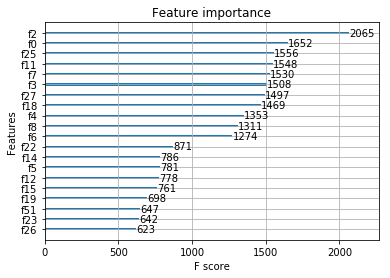

In [27]:
figure(figsize=(1000,1000))

xgb.plot_importance(xg_tree,max_num_features=20)
#ylabel(dictionnary)

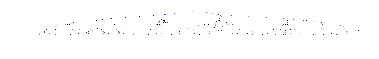

In [30]:
figure()
xgb.plot_tree(xg_tree,num_trees=2)
rcParams['figure.figsize'] = [20,20]
savefig('Tree 1')